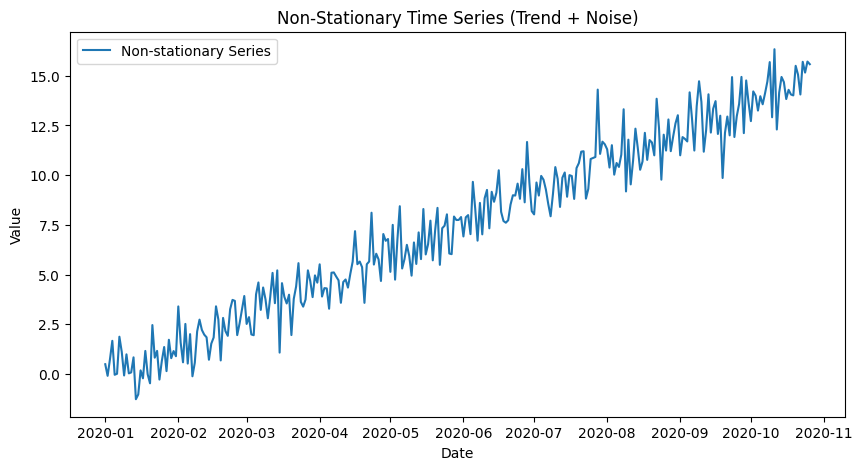

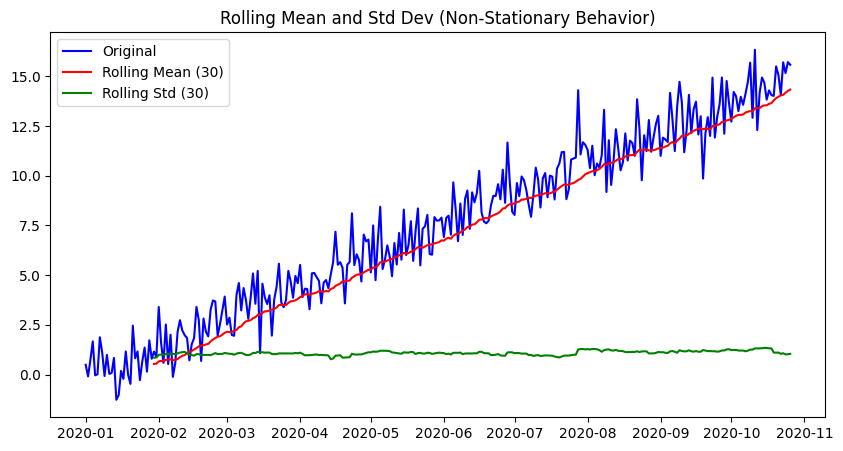

=== Augmented Dickey-Fuller (ADF) Test ===
ADF Statistic: 0.09335849561180244
p-value: 0.9656047115131975
Series is likely NON-STATIONARY

=== Kwiatkowski–Phillips–Schmidt–Shin (KPSS) Test ===
KPSS Statistic: 2.8192978653135516
p-value: 0.01
Series is likely NON-STATIONARY



C:\Users\Sarmita\AppData\Local\Temp\ipykernel_15500\2060547483.py:52: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series, nlags="auto")


In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss

# --- Step 1: Generate a non-stationary time series ---
np.random.seed(42)
n = 300

# Trend + noise (non-stationary)
time = np.arange(n)
trend = 0.05 * time                     # linear upward trend
noise = np.random.normal(0, 1, n)
y = trend + noise

data = pd.DataFrame({'y': y}, index=pd.date_range('2020-01-01', periods=n, freq='D'))

# --- Step 2: Visualize the time series ---
plt.figure(figsize=(10, 5))
plt.plot(data.index, data['y'], label='Non-stationary Series')
plt.title('Non-Stationary Time Series (Trend + Noise)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

# --- Step 3: Rolling statistics ---
rolling_mean = data['y'].rolling(window=30).mean()
rolling_std = data['y'].rolling(window=30).std()

plt.figure(figsize=(10, 5))
plt.plot(data['y'], color='blue', label='Original')
plt.plot(rolling_mean, color='red', label='Rolling Mean (30)')
plt.plot(rolling_std, color='green', label='Rolling Std (30)')
plt.title('Rolling Mean and Std Dev (Non-Stationary Behavior)')
plt.legend()
plt.show()

# --- Step 4: ADF and KPSS tests ---

def adf_test(series):
    result = adfuller(series)
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    if result[1] > 0.05:
        print("Series is likely NON-STATIONARY\n")
    else:
        print("Series is likely STATIONARY\n")

def kpss_test(series):
    result = kpss(series, nlags="auto")
    print("KPSS Statistic:", result[0])
    print("p-value:", result[1])
    if result[1] < 0.05:
        print("Series is likely NON-STATIONARY\n")
    else:
        print("Series is likely STATIONARY\n")

print("=== Augmented Dickey-Fuller (ADF) Test ===")
adf_test(data['y'])

print("=== Kwiatkowski–Phillips–Schmidt–Shin (KPSS) Test ===")
kpss_test(data['y'])
